# Features
- Presence of ingredient (0/1)
- % nutrient (e.g. fat)

# Preprocessing
- Map all ingredients to a unique index

- Map nutrient info to a category (high fat, high carb)

- Map total time to category (fast, medium, slow)

- Map cuisine to a unique index

# Visualization
- NA data distribution

- Ingredients distribution

- Time distribution by dataset

- Nutrient info by dataset

- Clustering, compared to title names

In [478]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [479]:
import pandas as pd
import numpy as np
from save_recipes import agg_data

In [569]:
!python save_recipes.py

61 datasets found
61 0 0 0
number of recipes 2046
61 datasets found
53 8 0 5
number of recipes 1740
number of recipes 362
number of recipes 221
save_recipes.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_index_mapping['title'] = url_index_mapping['title'].str.capitalize()
saving to clean_data/all/all_url_index_mapping.csv

saving to clean_data/all/all_recipes_nutrient.csv
saving to clean_data/mains/mains_filter_url_index_mapping.csv

saving to clean_data/mains/mains_filter_recipes_nutrient.csv
saving to clean_data/desserts/desserts_filter_url_index_mapping.csv

saving to clean_data/desserts/desserts_filter_recipes_nutrient.csv
saving to clean_data/sides/sides_filter_url_index_mapping.csv

saving to clean_data/sides/sides_filter_recipes_

In [521]:
!python get_embeddings.py

saving to clean_data/all/nutrient_features.csv

Using 498 unigrams that occur over 20 times
Using 491 bigrams that occur over 20 times
saving to clean_data/all/ing_features.csv

loading nutrient and ingredients from csv
saving to clean_data/all/embeddings_all.csv

saving to clean_data/all/embeddings_all_scaled.csv

saving to clean_data/mains/nutrient_features.csv

Using 452 unigrams that occur over 20 times
Using 440 bigrams that occur over 20 times
saving to clean_data/mains/ing_features.csv

loading nutrient and ingredients from csv
saving to clean_data/mains/embeddings_mains_filter.csv

saving to clean_data/mains/embeddings_mains_filter_scaled.csv

saving to clean_data/desserts/nutrient_features.csv

Using 118 unigrams that occur over 20 times
Using 77 bigrams that occur over 20 times
saving to clean_data/desserts/ing_features.csv

loading nutrient and ingredients from csv
saving to clean_data/desserts/embeddings_desserts_filter.csv

saving to clean_data/desserts/embeddings_desserts

In [522]:
!python label_recipes.py

saving to clean_data/mains/meat_label.csv

saving to clean_data/mains/starch_label.csv

saving to clean_data/desserts/meat_label.csv

saving to clean_data/desserts/starch_label.csv

saving to clean_data/sides/meat_label.csv

saving to clean_data/sides/starch_label.csv



In [567]:
idx = 324
main_recipes = pd.read_csv('../clean_data/mains/mains_filter_recipes_nutrient.csv')
main_recipes['title'].iloc[idx], main_recipes['ingredients'].apply(ast.literal_eval).iloc[idx]
# main_recipes.iloc[idx]

('Soy Milk Hot Pot',
 ['1 lb thinly sliced pork loin ((skip for vegetarian))',
  '7 oz enoki mushrooms ((1 package))',
  '3.5 oz shimeji mushrooms ((1 package))',
  '4 shiitake mushrooms',
  '¼ napa cabbage ((1.5 lb, 680 g))',
  '½ bunch mizuna (Japanese mustard green) ((or spinach or any leafy greens))',
  '1 bunch shungiku (Tong Ho/Garland Chrysanthemum) ((or any leafy greens))',
  '1 negi (long green onion) ((or leek or green onions/scallions))',
  '1 green onion/scallion',
  '1 medium-firm tofu ((14 oz, 396 g))',
  '½ daikon radish ((1 lb, 454 g))',
  '1 carrot ((3 oz, 85 g))',
  '1 gobo (burdock root) ((5.3 oz, 150 g))',
  '3 cups dashi (Japanese soup stock; click to learn more) ((720 ml) (I use Awase dashi. Kombu dashi for vegetarian/vegan))',
  '¼ cup sake ((4 Tbsp))',
  '¼ cup mirin ((4 Tbsp))',
  '2 cups unsweetened soy milk ((microwave till it’s warm))',
  '¼ cup miso ((4 Tbsp; I use awase miso))',
  '2 Tbsp toasted white sesame seeds',
  '¼ tsp kosher/sea salt (I use Diamond

In [555]:
# from recipe_scrapers import scrape_me
# scraper = scrape_me('https://omnivorescookbook.com/chinese-coconut-pork-soup/', wild_mode = True)
# scraper.ingredients()

['2 pounds (1 kilograms) pork ribs ((about half rack of ribs), chopped crosswise and then separated to bite size (*Footnote 1))',
 '2 pounds (1 kilograms) pork neck bones',
 'Option 1: 1 pack American Ginseng and Sea Coconut Herbal Mix',
 'Option 2: 1 can coconut milk',
 '1/2 thumb ginger (, sliced)',
 '4 green onions (, halved lengthwise)',
 '1 small taro root (, cubed (or yam) (yield about 1 cup))',
 '1 small sweet potato (, cubed (yield about 1 cup))',
 '1/2 Daikon radish (, cubed (yield about 1 cup))',
 '1 small head broccoli (, cut to bite size)',
 '/2 cup green peas ((Optional))',
 'Salt to taste']

In [568]:
main_recipes.loc[main_recipes['total_time'] > 120, 'total_time'] = 120
main_recipes['num_ingredients'] = main_recipes['ingredients'].apply(ast.literal_eval).apply(len)
main_recipes

,index,title,author,url,cuisine,image_url,ingredients,instructions,language,ratings,...,proteinContent,fatContent,saturatedFatContent,cholesterolContent,sodiumContent,sugarContent,fiberContent,transFatContent,unsaturatedFatContent,num_ingredients
0,0,miso chicken with maple and ginger,romain | glebekitchen,https://glebekitchen.com/miso-chicken-with-map...,Japanese,https://glebekitchen.com/wp-content/uploads/20...,['4 chicken breasts (boneless but with the ski...,"Combine the miso, sake, mirin, maple syrup, se...",en-US,5.00,...,49 g,12 g,4 g,144 mg,803 mg,5 g,NaN,NaN,NaN,9
1,1,tonkotsu ramen,romain | glebekitchen,https://glebekitchen.com/tonkotsu-ramen-home/,Japanese,https://glebekitchen.com/wp-content/uploads/20...,['8 cups tonkotsu pork broth ( - recipe link b...,"Chashu pork belly\nCombine the soy, sake, miri...",en-US,4.88,...,33 g,71 g,25 g,252 mg,2803 mg,28 g,4 g,NaN,NaN,22
2,2,garlic ginger grilled chicken,romain | glebekitchen,https://glebekitchen.com/garlic-ginger-grilled...,Japanese,https://glebekitchen.com/wp-content/uploads/20...,"['1/2 cup soy sauce', '2 Tbsp sake', '2 Tbsp g...",Combine all the ingredients except the chicken...,en-US,5.00,...,43 g,32 g,9 g,163 mg,1838 mg,6 g,NaN,NaN,NaN,7
3,3,tonkotsu ramen broth at home,romain | glebekitchen,https://glebekitchen.com/tonkotsu-ramen-broth-...,Japanese,https://glebekitchen.com/wp-content/uploads/20...,['6 lbs pork bones (with a little meat on them...,Place the pork bones in a large stock pot and ...,en-US,4.59,...,NaN,NaN,NaN,NaN,1 mg,NaN,NaN,NaN,NaN,3
4,4,Japanese chicken curry,romain | glebekitchen,https://glebekitchen.com/japanese-chicken-curr...,Japanese,https://glebekitchen.com/wp-content/uploads/20...,"['1 lb chicken thighs (boneless, skinless and ...",Prep your vegetables. Slice the onion into 1/8...,en-US,5.00,...,22.14 g,22.35 g,12.11 g,109.79 mg,1536.84 mg,6.68 g,5.62 g,NaN,NaN,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,1735,Spicy Cumin Lamb Biang Biang Noodles,Sarah,https://thewoksoflife.com/cumin-lamb-biang-bia...,Chinese,https://thewoksoflife.com/wp-content/uploads/2...,"['1 1/2 cups bread flour', '1/4 teaspoon salt'...","First, make the noodle dough. In the bowl of a...",en-US,4.97,...,19 g,19 g,6 g,36 mg,785 mg,4 g,3 g,NaN,NaN,23
1736,1736,Winter Lamb Stew with Spicy Sausage,Sarah,https://thewoksoflife.com/lamb-stew-spicy-saus...,Chinese,https://thewoksoflife.com/wp-content/uploads/2...,"['2 tablespoons olive oil (divided)', '½ pound...",Heat 1 tablespoon olive oil in a large pot or ...,en-US,5.00,...,27 g,21 g,6 g,74 mg,545 mg,6 g,5 g,NaN,NaN,15
1737,1737,Caribbean Spiced Lamb Stew,Sarah,https://thewoksoflife.com/lamb-stew/,Chinese,https://thewoksoflife.com/wp-content/uploads/2...,"['4 pounds goat or lamb shank ((1.8kg, cut int...","Put the meat in a large bowl, and toss with al...",en-US,5.00,...,21 g,8 g,1 g,51 mg,858 mg,5 g,5 g,NaN,NaN,19
1738,1738,Cumin Lamb,Judy,https://thewoksoflife.com/cumin-lamb/,Chinese,https://thewoksoflife.com/wp-content/uploads/2...,"['1 pound lamb ((450g, preferably shoulder, cu...",Pad lamb dry with paper towel before cutting. ...,en-US,4.80,...,20 g,38 g,12 g,83 mg,478 mg,1 g,1 g,NaN,NaN,14


In [559]:
main_recipes['total_time'].describe()

count    1740.000000
mean       54.939080
std        38.310267
min         0.000000
25%        25.000000
50%        40.000000
75%        81.250000
max       120.000000
Name: total_time, dtype: float64

In [552]:
main_recipes[main_recipes['total_time'] == max(main_recipes['total_time'])]['url']

851    https://omnivorescookbook.com/chinese-coconut-...
Name: url, dtype: object

In [524]:
# meat_labels = pd.read_csv('../clean_data/mains/meat_labels.csv', index_col = 'url')
# starch_labels = pd.read_csv('../clean_data/mains/starch_labels.csv', index_col = 'url')
# taste_labels = pd.read_csv('../clean_data/mains/nutrient_features.csv', index_col = 'url')

meat_labels = pd.read_csv('../clean_data/desserts/meat_labels.csv', index_col = 'url')
starch_labels = pd.read_csv('../clean_data/desserts/starch_labels.csv', index_col = 'url')

In [525]:
meat_labels

,veg
url,
https://mykoreankitchen.com/spicy-mayo-recipe/,1
https://mykoreankitchen.com/strawberry-milk/,1
https://mykoreankitchen.com/dakgangjeong-soy-garlic-fried-chicken/,1
https://mykoreankitchen.com/chili-oil-recipe/,1
https://mykoreankitchen.com/dalgona-coffee-whipped-coffee/,1
...,...
https://omnivorescookbook.com/homemade-lotus-seed-paste/,1
https://omnivorescookbook.com/baked-bbq-pork-buns/,1
https://omnivorescookbook.com/chinese-egg-cake/,1


In [494]:
meat_labels.columns, starch_labels.columns

(Index(['poultry', 'beef', 'pork', 'fish', 'seafood', 'veg'], dtype='object'),
 Index(['noodle', 'rice', 'soup', 'stew', 'none'], dtype='object'))

In [497]:
starch_labels[starch_labels['stew'] == 1]

,noodle,rice,soup,stew,none
url,,,,,
https://glebekitchen.com/japanese-chicken-curry-curry-rice/,0,0,1,1,0
https://glebekitchen.com/curry-chicken-ramen/,1,0,0,1,0
https://glebekitchen.com/30-minute-curry-ramen/,1,0,0,1,0
https://glebekitchen.com/vietnamese-chicken-curry-ca-ri-ga/,0,0,1,1,0
https://glebekitchen.com/bo-kho-vietnamese-beef-stew-with-egg-noodles/,1,0,0,1,0
...,...,...,...,...,...
https://thewoksoflife.com/curry-crab/,0,0,0,1,0
https://thewoksoflife.com/hong-kong-curry-fish-balls/,0,0,1,1,0
https://thewoksoflife.com/roasted-rack-lamb-w-turkish-spices-yogurt-sauce-rice/,0,1,0,1,0


In [323]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [324]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(all_labels)

In [340]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, all_labels.reset_index()[['meat']]], axis = 1)

In [343]:
np.unique(finalDf['meat'])

array(['beef', 'fish', 'lamb', 'pork', 'poultry', 'seafood', 'veg'],
      dtype=object)

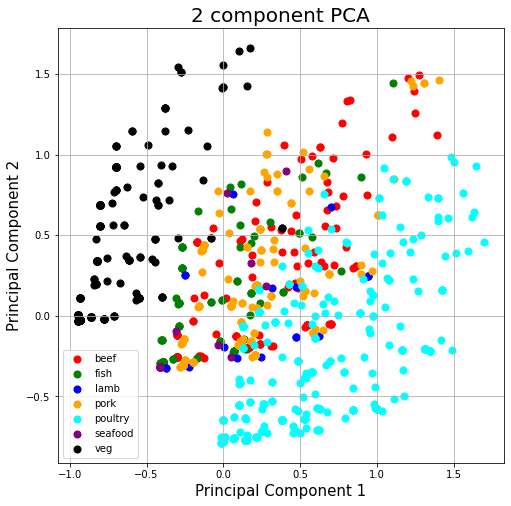

In [349]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['beef', 'fish', 'lamb', 'pork', 'poultry', 'seafood', 'veg']
colors = ['r', 'g', 'b', 'orange', 'cyan', 'purple', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['meat'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [300]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(all_labels)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1159 samples in 0.003s...
[t-SNE] Computed neighbors for 1159 samples in 0.098s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1159
[t-SNE] Computed conditional probabilities for sample 1159 / 1159
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.257885
[t-SNE] KL divergence after 300 iterations: 0.743153


In [326]:
def get_starch(row):
    for c in starch_labels.columns:
        if row[c]==1:
             return c
            
def get_meat(row):
    for c in meat_labels.columns:
        if row[c]==1:
             return c
            
def get_taste(row):
    for c in taste_labels.columns:
        if row[c]==1:
             return c
            
all_labels['meat'] = meat_labels.apply(get_meat, axis = 1)
all_labels['starch'] = starch_labels.apply(get_starch, axis = 1)
all_labels['taste'] = taste_labels.apply(get_taste, axis = 1)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

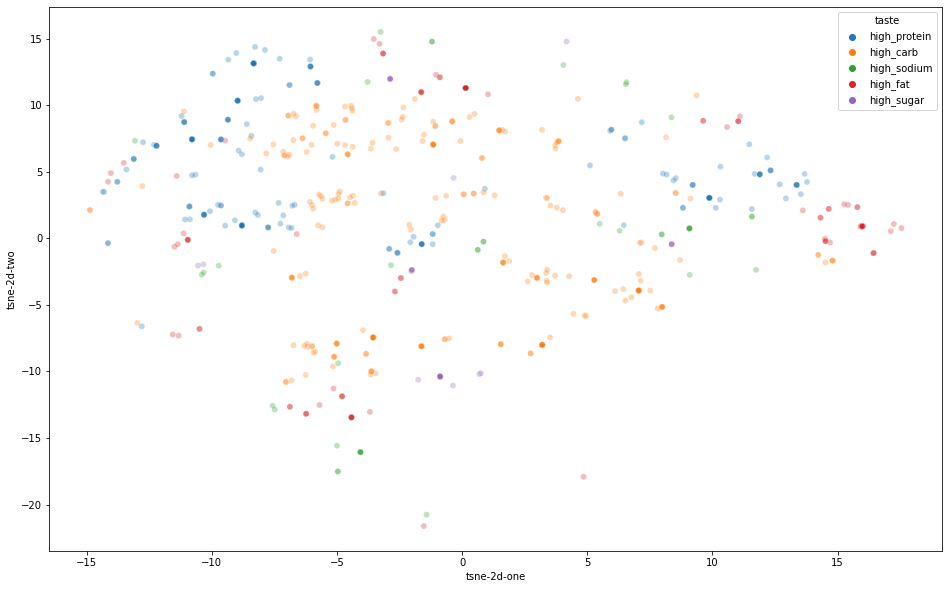

In [321]:
all_labels['tsne-2d-one'] = tsne_results[:,0]
all_labels['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="taste",
#     palette=sns.color_palette("hls", 5),
    data=all_labels,
    legend="full",
    alpha=0.3
)

In [350]:
all_labels

,high_carb,high_protein,high_fat,high_sodium,high_sugar,noodle,rice,soup,stew,salad,...,poultry,beef,pork,fish,seafood,lamb,veg,meat,starch,taste
url,,,,,,,,,,,,,,,,,,,,,
https://glebekitchen.com/miso-chicken-with-maple-and-ginger/,False,True,False,False,False,0,0,0,0,0,...,1,0,0,0,0,0,0,poultry,None,high_protein
https://glebekitchen.com/tonkotsu-ramen-home/,True,True,True,True,True,1,0,0,0,0,...,0,0,1,0,0,0,0,pork,noodle,high_carb
https://glebekitchen.com/garlic-ginger-grilled-chicken/,False,True,True,True,False,0,0,0,0,0,...,1,0,0,0,0,0,0,poultry,None,high_protein
https://glebekitchen.com/japanese-chicken-curry-curry-rice/,False,False,False,True,False,0,0,1,1,0,...,1,0,0,0,0,0,0,poultry,soup,high_sodium
https://glebekitchen.com/chicken-karaage-japanese-fried-chicken/,False,True,True,True,False,0,0,0,0,0,...,1,0,0,0,0,0,0,poultry,None,high_protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://thewoksoflife.com/cumin-lamb-biang-biang-noodles/,True,False,False,False,False,0,0,0,0,0,...,0,0,0,0,0,1,0,lamb,None,high_carb
https://thewoksoflife.com/lamb-stew-spicy-sausage/,False,False,False,False,False,0,0,0,0,0,...,0,1,1,0,0,1,0,beef,None,None
https://thewoksoflife.com/lamb-stew/,False,False,False,False,False,0,1,1,1,0,...,0,1,0,0,0,1,0,beef,rice,None


In [355]:
from get_recommendations_knn import process_embeddings
embeddings_df_scaled = process_embeddings()

In [356]:
embeddings_df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03
mean,-1.874883e-16,-1.656277e-17,-3.803398e-16,-1.134916e-17,1.414736e-17,1.231856e-16,1.330197e-16,1.458214e-15,4.977457e-17,-1.302420e-15
std,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00
min,-2.361155e+00,-1.973806e+00,-1.860859e+00,-2.243552e+00,-2.736388e+00,-5.752568e-01,-5.537138e-01,-5.728642e-01,-4.750940e-01,-5.513178e-01
25%,-7.608666e-01,-8.946493e-01,-5.307183e-01,-7.829676e-01,-6.083876e-01,-5.752568e-01,-5.537138e-01,-5.728642e-01,-4.750940e-01,-5.513178e-01
50%,-2.190336e-02,5.491257e-02,-1.623655e-01,-1.013753e-01,-8.358181e-02,-5.752568e-01,-5.537138e-01,-5.728642e-01,-4.750940e-01,-5.513178e-01
75%,8.564158e-01,7.770790e-01,2.438901e-01,6.183815e-01,5.157435e-01,-5.752568e-01,-5.537138e-01,-5.728642e-01,-4.750940e-01,-5.513178e-01
max,3.797664e+00,3.177098e+00,4.621813e+00,3.290873e+00,3.780280e+00,1.738354e+00,1.805987e+00,1.745614e+00,2.104847e+00,1.813836e+00
